In [11]:
%reload_ext autoreload
%autoreload 2

## Script

### Initialize, train and test function

In [17]:
from npfd.models.base import HiddenMarkovModel

def train_evaluate(plot_results=False, 
                   log=True,
                   **kwargs):
    
    X_train, X_test, y_train, y_test = data.dataset.make_dataset('dmps', 
                                                                 clean_interim_dir=True, 
                                                                 test_size=0.3)
    

    model = HiddenMarkovModel()
    
    model.initialize(X_train, **kwargs)
    model.train(X_train, y_train, **kwargs)

    model.edit([f'AT 2 4 0.2 {{ne.transP}}', f'AT 4 2 0.2 {{ne.transP}}'])
    model.train(X_train, y_train, **kwargs)

    for i in range(1, kwargs['gaussian_duplication_times']+1):
        model.edit([f'MU {2**i} {{*.state[2-4].mix}}'])
        model.train(X_train, y_train, **kwargs)

    results = model.test(X_test, y_test, **kwargs)

    try:
        score = results['WORD_Acc']
    except:
        score = -10
    if score < 0:
        score = -10

    if log:
        run = client.set_experiment_run(desc=EXPERIMENT_DESCRIPTION)
        run.log_hyperparameters(kwargs)
        run.log_metric('Accuracy', score)
    
    if plot_results:
        if score > 70:
            viz.visualize.generate_plots(run.id, X_test, y_test, results)
        
    return results['WORD_Acc']

### Hyperparameter space search

In [21]:
import skopt
from skopt.plots import plot_convergence
import matplotlib.pyplot as plt

from npfd import data

vf = [0.001, 8] 
mv = [0.001, 10] # Max is 10
wip = [0.0, 50]
gsf = [5, 100]
gdt = [3, 7]

space = [skopt.space.Real(vf[0], vf[1], name='variance_floor', prior='log-uniform'),
          skopt.space.Real(mv[0], mv[1], name='minimum_variance', prior='log-uniform'),
#          skopt.space.Real(wip[0], wip[1], name='word_insertion_penalty', prior='uniform'),
#          skopt.space.Real(gsf[0], gsf[1], name='grammar_scale_factor', prior='uniform'),
         skopt.space.Integer(gdt[0], gdt[1], name='gaussian_duplication_times')
]

@skopt.utils.use_named_args(space)
def objective(**params):
    return -1.0 * train_evaluate(**params)

### Set up VertaAI

In [22]:
from verta import Client

HOST = 'http://127.0.0.1:3000'
PROJECT_NAME = "NPF Detector"
EXPERIMENT_NAME = "20/07/2021 - Automated search"
EXPERIMENT_DESCRIPTION = f"""
* Make dataset in each iteration

Search space :
- variance_floor={vf[0], vf[1]}
- minimum_variance={mv[0], mv[1]}
- word_insertion_penalty={wip[0], wip[1]}
- grammar_scale_factor={gsf[0], gsf[1]}
- gaussian_duplication_times= {gdt[0], gdt[1]}""" 

client = Client(HOST)
proj = client.set_project(PROJECT_NAME)
expt = client.set_experiment(EXPERIMENT_NAME)

connection successfully established
set existing Project: NPF Detector from personal workspace
created new Experiment: 20/07/2021 - Automated search


Run the optimizer

In [23]:
results = skopt.gp_minimize(objective, space, n_calls=200)

best_auc = -1.0 * results.fun
best_params = results.X

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Testing model: 27


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:07:42 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Testing model: 23


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/23/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/23/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:08:15 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:09:01 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Testing model: 23


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/23/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/23/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:09:37 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:10:21 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:11:15 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Testing model: 23


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/23/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/23/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:11:45 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Testing model: 23


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/23/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/23/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:12:16 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Testing model: 27


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:12:52 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Testing model: 27


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:13:30 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:14:16 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:15:01 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:15:46 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:16:30 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:17:15 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Testing model: 27


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:17:54 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:18:39 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:19:25 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Testing model: 19


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/19/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/19/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:19:54 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:20:56 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:21:42 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:22:27 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Testing model: 19


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/19/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/19/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:22:58 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:23:44 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:24:29 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:25:14 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:26:02 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Testing model: 19


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/19/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/19/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:26:30 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:27:17 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:28:02 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:28:47 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Testing model: 27


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:29:32 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:30:18 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:31:04 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:31:49 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:32:35 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:33:21 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:34:07 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:34:53 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:35:38 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Testing model: 27


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:36:21 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:37:07 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:37:54 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:38:39 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:39:24 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Testing model: 27


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:40:00 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:41:20 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Testing model: 19


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/19/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/19/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:41:50 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:43:20 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:44:08 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:44:55 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:45:52 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:46:50 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:47:59 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:48:56 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:49:46 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:50:32 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:51:16 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Testing model: 19


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/19/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/19/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:51:45 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:52:31 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Testing model: 23


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/23/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/23/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:53:03 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:54:05 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:55:10 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:55:54 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:56:40 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:57:42 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:58:44 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 01:59:45 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:00:46 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off

 WARNING [-2637]  HeaviestMix: mix 32 in e has v.small gConst [-10000000000.000000] in /home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HHEd

Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:01:48 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:02:50 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:03:52 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:04:54 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off

 WARNING [-2637]  HeaviestMix: mix 8 in e has v.small gConst [-762.166382] in /home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HHEd

Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:05:56 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:06:42 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:07:28 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:08:14 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:08:59 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:09:45 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:10:35 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:11:20 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:12:06 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:12:56 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:13:46 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:14:36 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:15:28 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:16:20 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:17:13 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:17:59 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:18:44 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:19:29 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:20:15 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:21:01 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:21:46 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:22:33 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:23:19 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:24:05 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:24:51 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:25:37 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:26:22 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:27:08 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:27:54 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:28:40 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:29:26 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:30:12 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:30:58 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:31:44 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:32:30 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:33:17 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:34:03 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:34:49 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:35:36 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:36:23 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:37:11 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:37:57 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:38:45 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:39:31 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:40:17 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:41:04 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:41:51 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:42:39 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:43:26 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:44:16 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:45:03 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:45:50 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 35
INFO:root:Testing model: 35


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/35/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:46:54 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:47:45 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:48:40 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:49:35 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:50:23 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:51:10 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Testing model: 23


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/23/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/23/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:51:46 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:52:33 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:53:20 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:54:08 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:54:56 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:55:43 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:56:30 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:57:17 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:58:04 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:58:52 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 02:59:39 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:00:28 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:01:17 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:02:06 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:02:55 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:03:45 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:04:33 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:05:22 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:06:11 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:07:01 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:07:50 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:08:39 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:09:34 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:10:31 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:11:26 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:12:17 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:13:10 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:14:00 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:14:50 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:15:40 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:16:30 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:17:20 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:18:11 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:19:00 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:19:50 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:20:37 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:21:25 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:22:14 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:23:02 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:23:51 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:24:39 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:25:28 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:26:17 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:27:06 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:27:55 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:28:43 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:29:33 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:30:22 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:31:11 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:31:59 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:32:48 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:33:36 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:34:26 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:35:15 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:36:04 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:36:54 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:37:44 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:38:33 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:39:23 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:40:13 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:41:03 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:41:53 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:42:42 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:43:33 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:44:22 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:45:12 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:46:02 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:46:53 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 31
INFO:root:Testing model: 31


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/31/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Tue Jul 20 03:47:46 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/

AttributeError: X

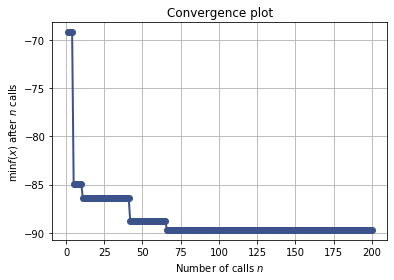

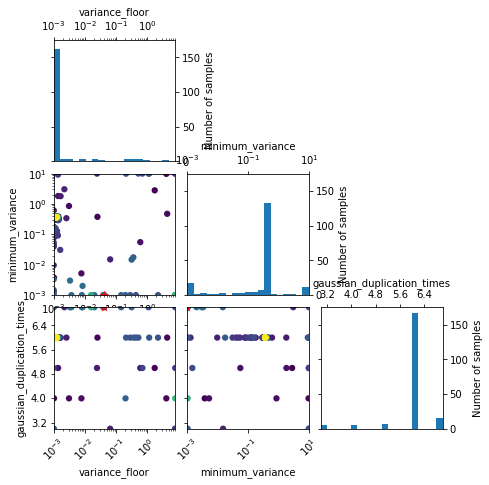

In [24]:
# print("""Best parameters:
# - variance_floor=%.6f
# - minimum_variance=%.6f
# - word_insertion_penalty=%.2f
# - grammar_scale_factor=%.2f
# - gaussian_duplication_times=%d""" % (results.x[0], results.x[1],
#                                       results.x[2], results.x[3],
#                                       results.x[4]))

plot_convergence(results)
plt.show()

skopt.plots.plot_evaluations(results)
plt.show()

In [25]:
results#.get_hyperparameters()

          fun: -89.7
    func_vals: array([-69.19, -47.4 , -60.61, -25.16, -84.94, -62.79, -55.83, -54.65,
       -68.29,  -6.54, -86.42, -74.12, -83.53, -75.14, -74.39, -47.13,
       -58.43, -73.01, -56.62,  80.  , -76.19, -72.83,  -9.47, -82.42,
       -80.84, -78.21, -68.49, -45.03, -81.94, -83.24, -78.17,  -7.56,
       -77.78, -55.43, -72.  , -78.57, -76.79, -73.71, -79.04, -81.67,
       -69.8 , -88.82, -69.72, -70.33, -80.22, -45.45, -52.33, -50.89,
       -61.05, -74.27, -66.27, -15.61, -74.16, -51.85, -59.17,  12.16,
       -74.71, -75.92, -30.86, -72.61, -42.18, -71.88,  -1.16, -74.33,
       -79.89, -89.7 , -83.23, -85.63, -86.55, -83.14, -85.89, -82.39,
       -84.05, -83.33, -83.04, -78.18, -81.76, -78.16, -76.13, -70.78,
       -77.33, -71.58, -77.09, -83.96, -73.77, -76.13, -83.33, -80.81,
       -77.62, -78.82, -78.02, -69.48, -69.75, -76.36, -69.13, -84.31,
       -84.02, -63.64, -79.73, -79.44, -74.47, -68.53, -78.95, -76.92,
       -79.63, -80.95, -78.36, -76.47, -8

## Best experiments

In [116]:
print(f"# de experimentos: {expt.expt_runs}")

for e in expt.expt_runs.find("metrics.Accuracy > 70"):
    params = e.get_hyperparameters()
    train_evaluate(X_train, X_test, y_train, y_test, log=False, **params)

# de experimentos: <ExperimentRuns containing 324 runs>
set existing ExperimentRun: Run 1785816255236353315084


INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 3
INFO:root:Editing model 3


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 4
INFO:root:Training the model...



Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 7
INFO:root:Editing model 7


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 8
INFO:root:Training the model...



Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 27
INFO:root:Editing model 27
INFO:root:Most trained model: 28
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 31
INFO:root:Editing model 31
INFO:root:Most trained model: 32
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 35
INFO:root:Editing model 35
INFO:root:Most trained model: 36
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 39
INFO:root:Testing model: 39


Pruning-On[250.0 150.0 1000.0]

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/39/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/39/hmmdefs -p 1.5116202479 -s 50.5001414153 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Mon Jul  5 20:08:13 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Te

UnboundLocalError: local variable 'run' referenced before assignment